## Importing the necessary libraries:

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from statsmodels.tsa.seasonal import seasonal_decompose #for dealing with seasonality in data
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

In [2]:
#loading the time series data 
data = pd.read_csv('C:/Users/Administrator/Desktop/Intellipat/Python ML/Time Series Models/ARIMA, sarimax/AirPassengers.csv')

## Exploratory Data Analysis:

In [3]:
#EDA on the time series data : data collected on a monthly basis
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
data.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [5]:
data['Month'] = pd.to_datetime(data['Month']) #convert values in 'Month' to datetime format 
data.index = data['Month'] #Converting 'Month' to index since we do not require index info
del data['Month']

In [6]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


## Visualizing the data:

<AxesSubplot:xlabel='Month'>

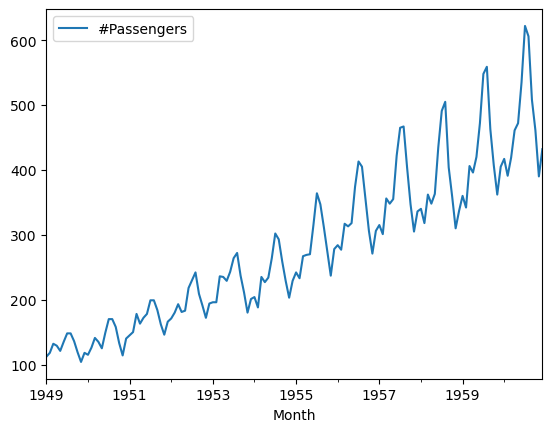

In [7]:
#plotting the time series
data.plot()
#inference from plot : uptrend

## Check for stationarity:

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation (Logarithmic Scale)')

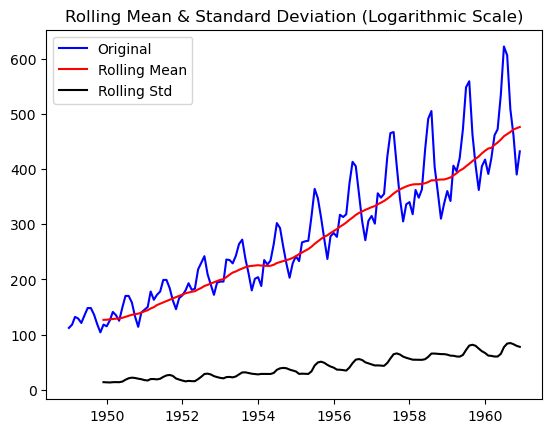

In [8]:
#checking the stationarity of the series  1.ROLLING STATS
#is the mean constant?
mean_log = data.rolling(window=12).mean() #for moving stats value, rolling function has been used for 12 months
std_log = data.rolling(window=12).std()

#how is the rolling mean calculated above?
#each value in the rolling mean series is the average of the current value and the previous 11 values

plt.plot(data, color='blue', label='Original')
plt.plot(mean_log, color='red', label='Rolling Mean')
plt.plot(std_log, color='black', label='Rolling Std')
plt.legend(loc='best') #
plt.title('Rolling Mean & Standard Deviation (Logarithmic Scale)')
#inference from plot : mean and std dev are varying and not constant

In [9]:
#checking the stationarity of the series 2. ADCF test
#less than 0.05: reject null hypothesis
from statsmodels.tsa.stattools import adfuller
result = adfuller(data['#Passengers'])
print(result)
result_data1=pd.Series(result[0:3],index=['Test Statistic','p-value','Number of Observations'])
print(result_data1)
#inference : p-val>0.05 :: not stationary

(0.8153688792060456, 0.991880243437641, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)
Test Statistic             0.815369
p-value                    0.991880
Number of Observations    13.000000
dtype: float64


## Transformations for making data stationary:

#### Transformation step 1:

<AxesSubplot:xlabel='Month'>

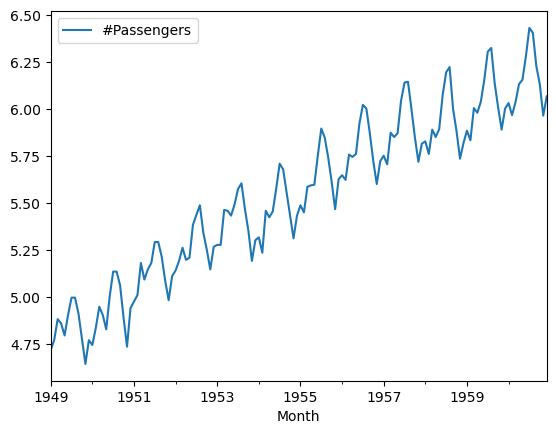

In [10]:
#logrithmic comutation to make the time series stationary : logarithmic transformation
#other transformations: square, root,cube etc..
first_log = np.log(data)
first_log = first_log.dropna()
first_log.plot()
#inference from plot : compared to plot earlier now we see the trend has become nearly constant though the moving mean is not constant

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation (Logarithmic Scale)')

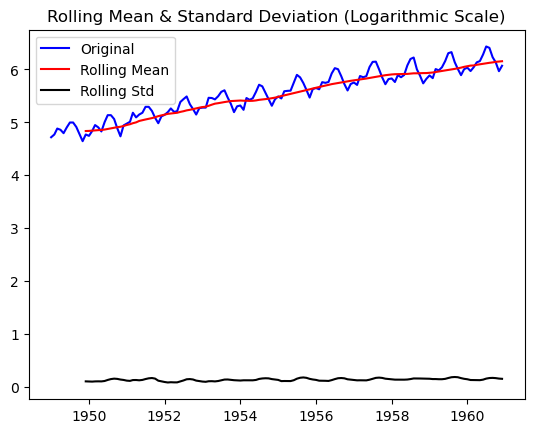

In [11]:
mean_log = first_log.rolling(window=12).mean()
std_log = first_log.rolling(window=12).std()

plt.plot(first_log, color='blue', label='Original')
plt.plot(mean_log, color='red', label='Rolling Mean')
plt.plot(std_log, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation (Logarithmic Scale)')
#inference from plot : std dev has become constant and has fallen into the same plane. mean is still varying, but moving closer to becoming constant

#### Transformation step 2:

__Detrendng__ helps to isolate the underlying trends in the data that are not related to any systematic trends

In [12]:
new_data = first_log - mean_log #detrend the data
new_data = new_data.dropna()
new_data.head()  

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


In [13]:
#adfuller test for stationarity
result = adfuller(new_data['#Passengers'])
print(result)
result_data2=pd.Series(result[0:3],index=['Test Statistic','p-value','Number of Observations'])
print(result_data2)
#inference : p-val<0.05 :: has bee changed to stationary

(-3.162907991300878, 0.022234630001242536, 13, 119, {'1%': -3.4865346059036564, '5%': -2.8861509858476264, '10%': -2.579896092790057}, -436.63269481747034)
Test Statistic            -3.162908
p-value                    0.022235
Number of Observations    13.000000
dtype: float64


Text(0.5, 1.0, 'Rolling Mean & Standard Deviation (Logarithmic Scale)')

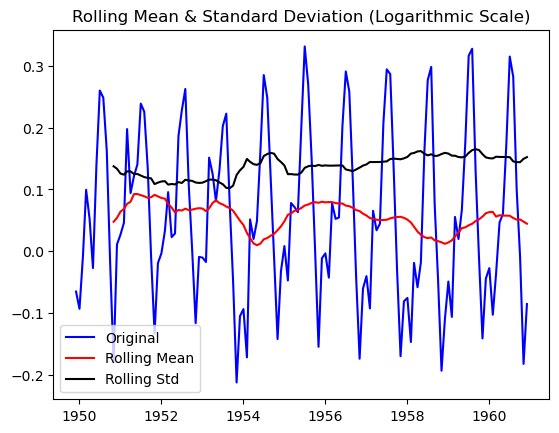

In [14]:
mean_log = new_data.rolling(window=12).mean()
std_log = new_data.rolling(window=12).std()

plt.plot(new_data, color='blue', label='Original')
plt.plot(mean_log, color='red', label='Rolling Mean')
plt.plot(std_log, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation (Logarithmic Scale)')

## Seasonal Decompose:

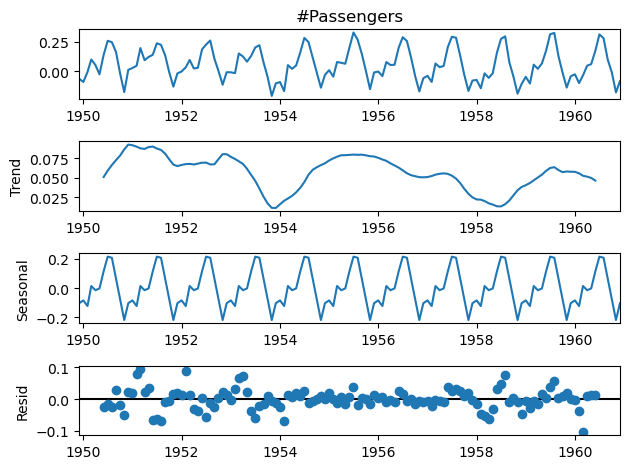

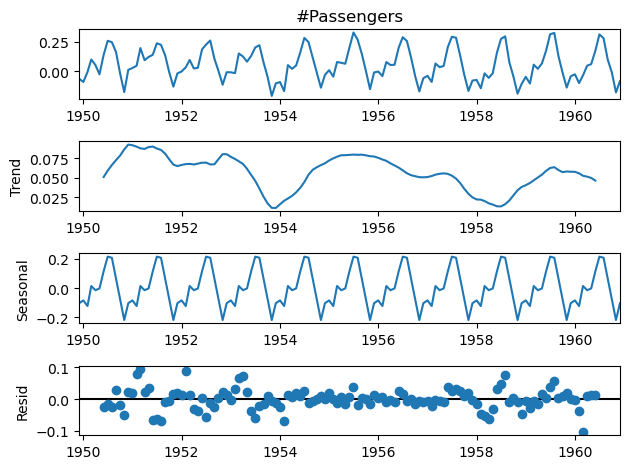

In [15]:
#seasonal Decompose
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result = seasonal_decompose(new_data['#Passengers'].dropna())

decompose_result.plot()
#inference from plot : in seasonal graph we notice a pattern, hence despite making data stationary it still has some seasonality components

## Obtaining p,d,q values:

__d__ -> depends on number of transformations done ( in this case 1, hence d=0 )</br>
__p__ -> obtained from partial autocorrelation plot ( how many past values to be considered in prediction )</br>
__q__ -> obtained from autocorrelation plot ( how many past errors to be considered in prediction )</br>

C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


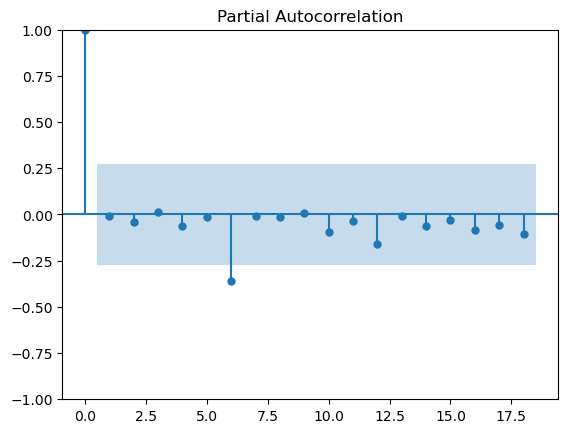

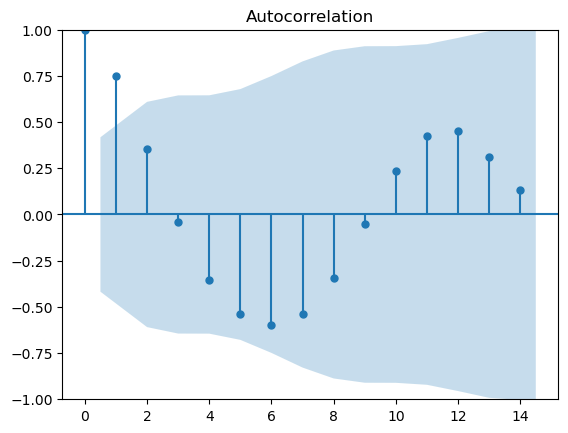

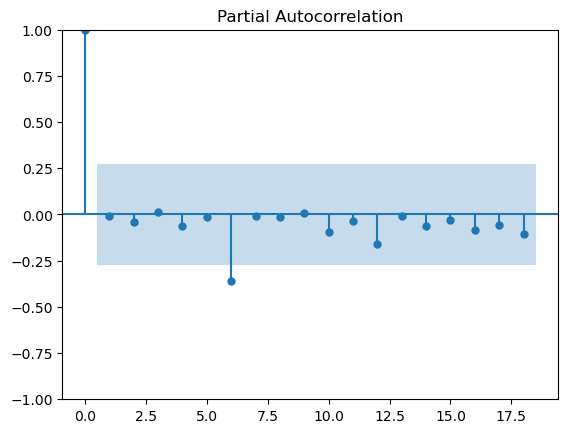

In [16]:
#autocorrelation : correlation of one time lag with the next time lag, direct autocorrelation : y(t) and y(t-1)
#partial autocorrelation : correlation of one time lag with any other time lag, indirect autocorrelation : y(t) and y(t-2)
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
acf_plot=acf(new_data)
pacf_plot=pacf(new_data, nlags=50)
plot_acf(acf_plot)
plot_pacf(pacf_plot)
#inference from plot : take the first value after which a major deviation is seen in the plot

In [17]:
# from pmdarima.arima import auto_arima

# model = auto_arima(new_data, seasonal=True, m=12, suppress_warnings=True)
# print(model.order)

## ARIMA model:

In [18]:
from statsmodels.tsa.arima.model import ARIMA

train = new_data.iloc[:120]['#Passengers']
test = new_data.iloc[121:]['#Passengers']

model = ARIMA(train, order=(1,0,2)) #p=1,d=0,q=2
model_fit = model.fit()

C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='Month'>

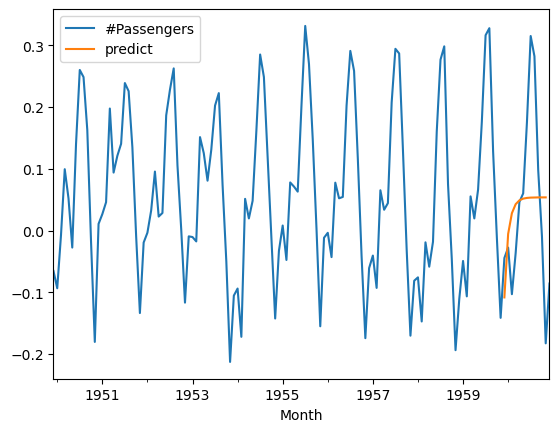

In [19]:
#predictions for both training and testing data
new_data['predict'] = model_fit.predict(start= len(train), 
                                    end=len(train)+len(test)- 1, 
                                    dynamic=True)
new_data[['#Passengers','predict']].plot()
#inference from plot : prediction is observed to be wrongly made. This is due to the seasonality observed in data earlier

## SARIMAX model:

In [20]:
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults

model = SARIMAX(train, order=(1,0,2), seasonal_order=(1,0,2,12)) #p=1,d=0,q=2,prediction period=12
model = model.fit()

C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:xlabel='Month'>

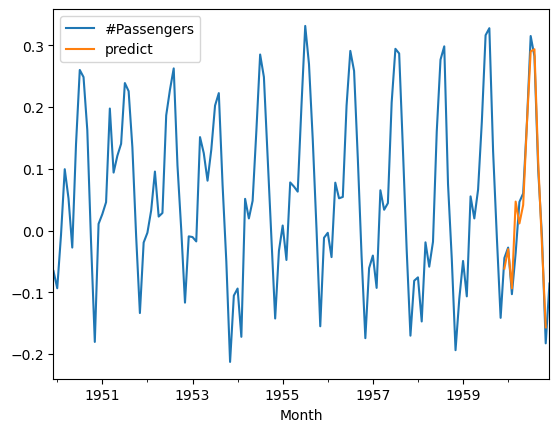

In [21]:
new_data['predict'] = model.predict(start= len(train) ,
                                                       end=len(train)+len(test)- 1, 
                                                       dynamic=True)
new_data[['#Passengers','predict']].plot()
#inference from plot : prediction almost aligns with training predictions

## Forecast:

<AxesSubplot:xlabel='Month'>

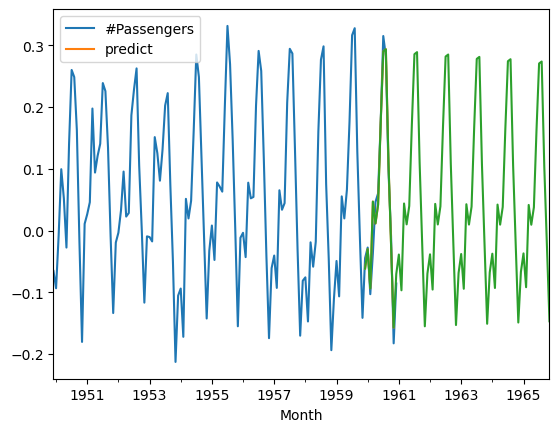

In [25]:
#predicting the projections for the next 5 years
forecast = model.forecast(steps=72)
new_data.plot()
forecast.plot()

In [26]:
forecast.tail()

1965-07-01    0.270697
1965-08-01    0.273837
1965-09-01    0.103842
1965-10-01   -0.022292
1965-11-01   -0.146952
Freq: MS, Name: predicted_mean, dtype: float64